In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
so2AllData = pd.DataFrame()

**Data Preprocessing** 

In [ ]:
def processData(filename):
  #read input file
  df2007 = pd.read_csv(filename, encoding="utf8")
  #Extract date,month and year from "Date Local"
  df2007['month'] = pd.DatetimeIndex(df2007['Date Local']).month
  df2007['day'] = pd.DatetimeIndex(df2007['Date Local']).day
  df2007['year'] = pd.DatetimeIndex(df2007['Date Local']).year
  #Remove duplicate rows and null values
  df2007 = df2007.dropna()
  df2007 = df2007.drop_duplicates()
  #Keep State code in int format only
  df2007['State Code'] = pd.to_numeric(df2007['State Code'])
  #Remove irrelevant column
  df2007 = df2007.drop(columns=['Observation Percent'])
  #Encode event type
  le = preprocessing.LabelEncoder()
  df2007['Event Type'] = le.fit_transform(df2007['Event Type'])
  return df2007

**Read data files from 2000-2017 and for training data**

In [ ]:
so2AllData = pd.concat(
    map(processData, ['/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2000.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2001.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2002.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2003.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2004.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2005.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2006.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2007.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2008.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2009.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2010.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2011.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2012.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2013.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2014.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2015.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2016.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2017.csv'
                      ]), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.


In [ ]:
so2AllData = so2AllData.select_dtypes(exclude=['object']) 

**Taking daily summary of 2000-2018 as training data. and 2019 & 2020 data as test data**


In [ ]:
x_train = so2AllData.drop(['AQI'], axis=1).values
y_train = so2AllData['AQI'].values

In [ ]:
testdata = pd.DataFrame()

In [ ]:
testdata = pd.concat(
    map(processData, [
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2018.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2019.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2020.csv'
                      ]), ignore_index=True)

In [ ]:
testdata = testdata.select_dtypes(exclude=['object'])

In [ ]:
x_test = testdata.drop(['AQI'], axis=1).values
y_test = testdata['AQI'].values

**LogisticRegression ran out of memory**

In [ ]:
#Regressor1 LogisticRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predicted_AQI=lr.predict(x_test)
lr.score(x_test,y_test)

**LinearRegression predicted with 50% test accuracy**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)

0.5472905851932828

In [ ]:
reg.score(x_test, y_test)

0.49642129625292253

**RandomForestRegressor predicted with 30% test accuracy**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor()
clf_rf = clf_rf.fit(x_train, y_train)
print(clf_rf.score(x_test,y_test))

0.2957474436992166


**BayesianRidge predicted with 50% test accuracy**

In [ ]:
from sklearn.linear_model import BayesianRidge
clf = BayesianRidge()
clf.fit(x_train, y_train)
print(clf.score(x_test,y_test))

0.4964644808078603


**GradientBoostingRegressor predicted with 35% test accuracy**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
grb = GradientBoostingRegressor()
grb.fit(x_train, y_train)
print(grb.score(x_test,y_test))

0.35468722027890387


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kreg = KNeighborsRegressor()
kreg.fit(x_train, y_train)
print(kreg.score(x_test,y_test))

**Ploted n_estimator vs test accuracy score to choose best n_estimator**

In [ ]:
test_score=[]
from sklearn.ensemble import GradientBoostingRegressor
for i in (5,10,20,30,40,50,70):
  grb = GradientBoostingRegressor(n_estimators=i)
  grb.fit(x_train, y_train)
  test_score.append(grb.score(x_test, y_test))

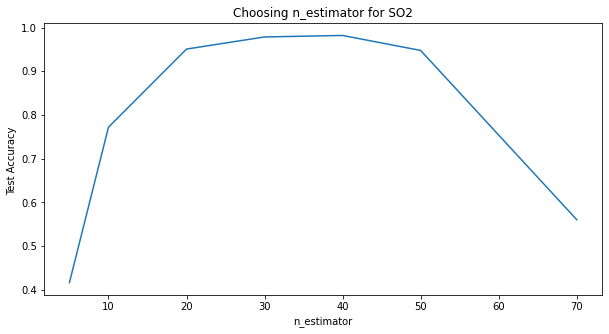

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=[5,10,20,30,40,50,70], y=test_score)
plt.ylabel('Test Accuracy ')
plt.xlabel('n_estimator')
plt.title('Choosing n_estimator for SO2')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
grb = GradientBoostingRegressor(n_estimators=40)
grb.fit(x_train, y_train)
print(grb.score(x_test,y_test))

0.9820155519901449
